In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [116]:
file_path = r'/mnt/c/Users/Administrador/Downloads/GDAXI_M5_202302230505_202411012350.csv'
df = pd.read_csv(file_path, delimiter='\t')
df.head(5)

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2023.02.23,05:05:00,15472.4,15475.4,15470.4,15472.4,42,0,33
1,2023.02.23,05:10:00,15473.4,15476.4,15472.4,15474.4,43,0,33
2,2023.02.23,05:15:00,15474.9,15475.9,15471.4,15472.4,36,0,33
3,2023.02.23,05:20:00,15472.4,15475.4,15472.4,15473.4,33,0,33
4,2023.02.23,05:25:00,15473.4,15474.4,15471.9,15472.4,17,0,33


In [117]:
column = '<CLOSE>'

In [118]:
result = adfuller(df[column])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.622007
p-value: 0.865931
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


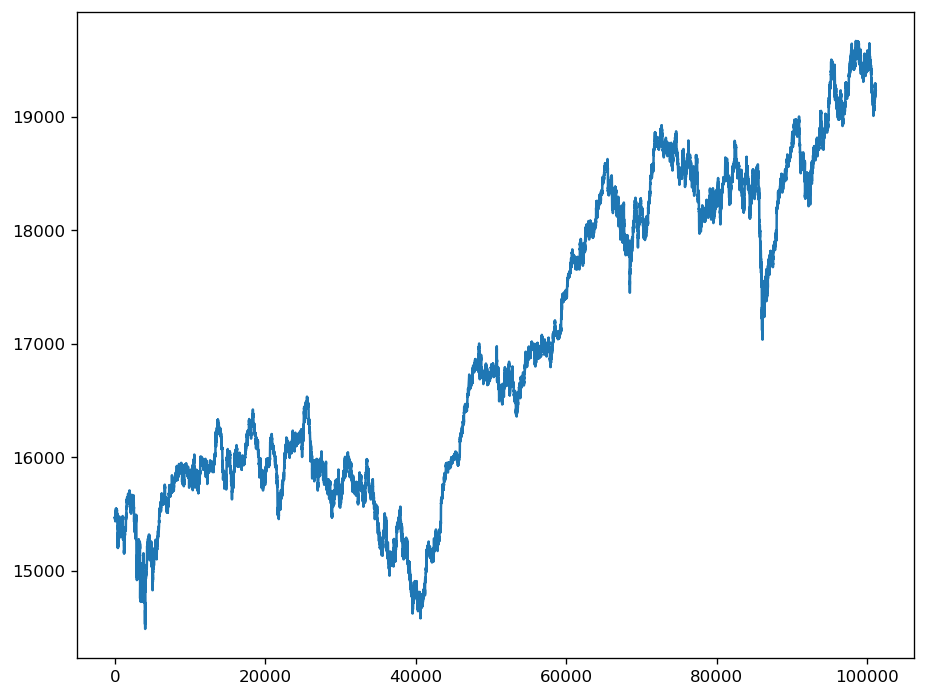

In [119]:
df[column].plot()
plt.show()

### Valor p

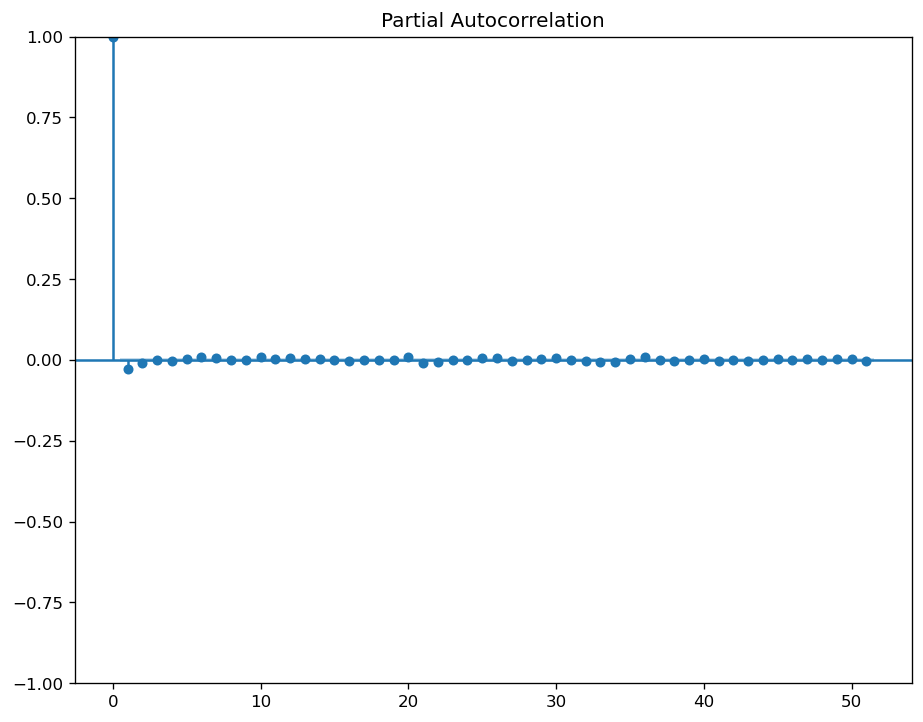

In [120]:
plot_pacf(df[column].diff().dropna())
plt.show()

### Valor d

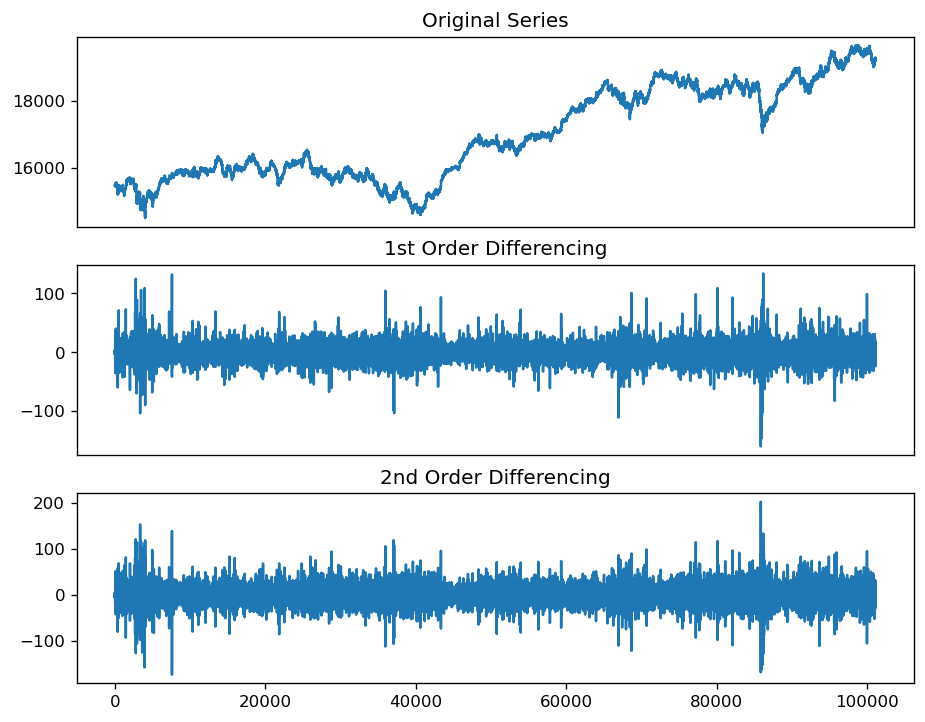

In [121]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df[column])
ax1.set_title('Original Series')
ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df[column].diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df[column].diff().diff())
ax3.set_title('2nd Order Differencing')
plt.show()

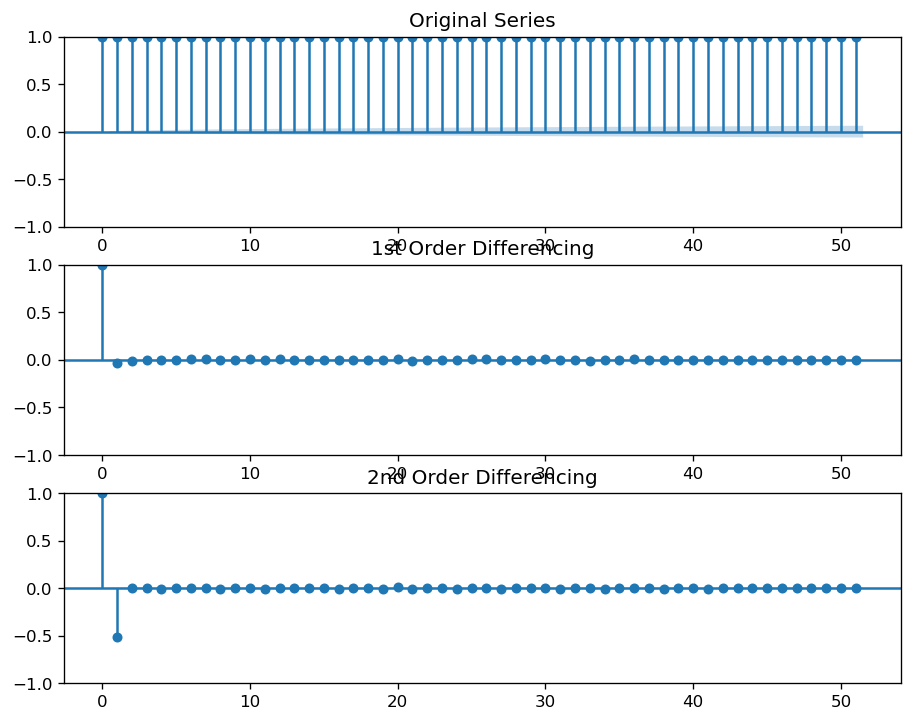

In [122]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df[column], ax=ax1, title='Original Series')
plot_acf(df[column].diff().dropna(), ax=ax2, title='1st Order Differencing')
plot_acf(df[column].diff().diff().dropna(), ax=ax3, title='2nd Order Differencing')
plt.show()

### Valor q

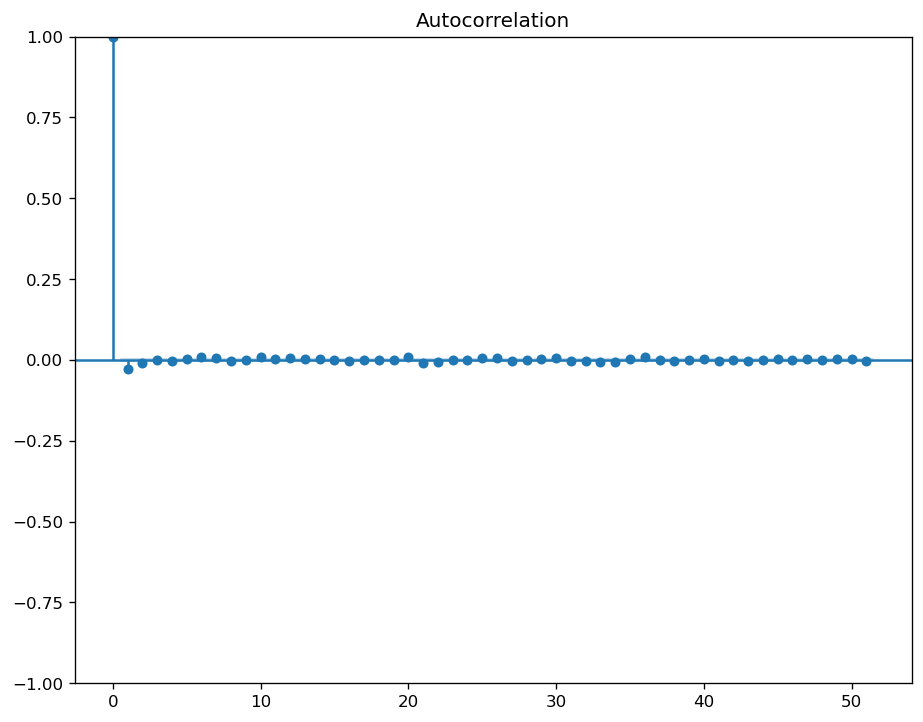

In [123]:
plot_acf(df[column].diff().dropna())
plt.show()

### Modelo ARIMA

In [129]:
model = ARIMA(df[column], order = (1, 2, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                <CLOSE>   No. Observations:               101169
Model:                 ARIMA(1, 2, 1)   Log Likelihood             -360961.108
Date:                Sun, 03 Nov 2024   AIC                         721928.216
Time:                        12:01:13   BIC                         721956.789
Sample:                             0   HQIC                        721936.882
                             - 101169                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0282      0.002    -15.903      0.000      -0.032      -0.025
ma.L1         -1.0000   5.33e-05  -1.88e+04      0.000      -1.000      -1.000
sigma2        73.5504      0.118    623.173      0.000      73.319      73.782
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            753482.53
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

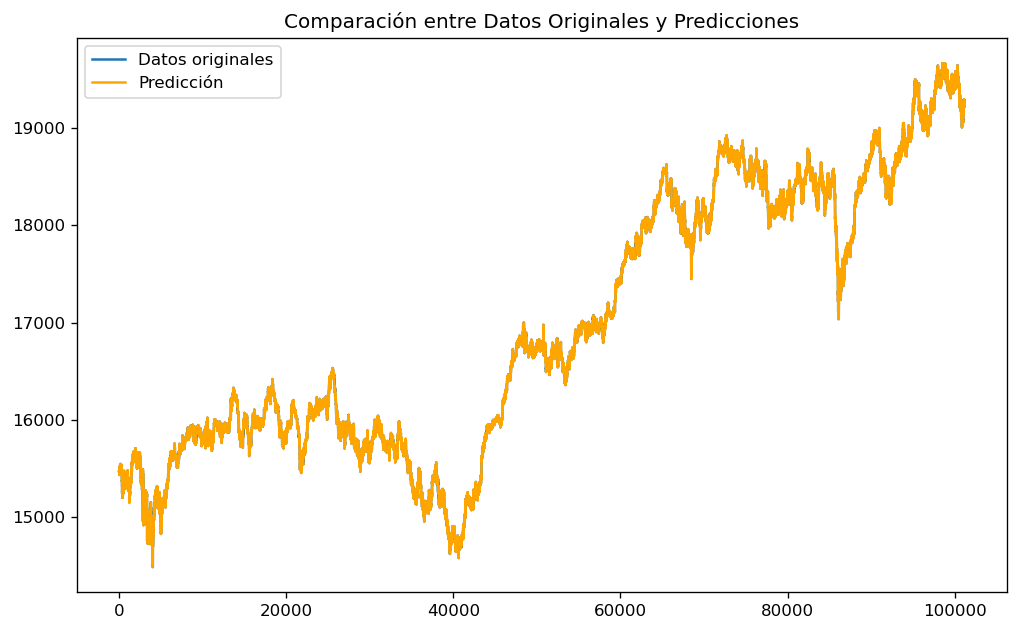

In [127]:
predictions = model_fit.predict()
df_pred = pd.concat([df[column][2:], predictions[2:]], axis=1)
df_pred.columns = columns=['original', 'predicted']
# Visualización
plt.figure(figsize=(10, 6))
plt.plot(df_pred['original'], label='Datos originales')
plt.plot(df_pred['predicted'], label='Predicción', color='orange')
plt.legend()
plt.title('Comparación entre Datos Originales y Predicciones')
plt.show()